In [42]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [43]:
mnist = fetch_openml('mnist_784')

In [44]:
x, y = mnist['data'], mnist['target']

In [45]:
x.shape


(70000, 784)

In [46]:
y.shape

(70000,)

In [76]:
random_number = np.array(x.iloc[48000])
random_number_image = random_number.reshape(28, 28)
#reshaping it for plotting

(-0.5, 27.5, 27.5, -0.5)

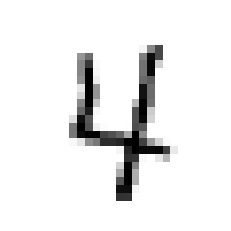

In [77]:
plt.imshow(random_number_image, cmap=matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')

In [78]:
y[48000]

'4'

In [79]:
x_train, x_test = x[: 60000], x[60000:]
y_train, y_test = y[: 60000], y[60000:]

In [80]:
#shuffling the training set so that if a group of number are together,the will get shuffled and wont create a problem afterwards
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

#Creating a 4 detector

In [81]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_4 = (y_train==4)
y_test_4 = (y_test==4)

In [82]:
y_test_4

60000    False
60001    False
60002    False
60003    False
60004     True
         ...  
69995    False
69996    False
69997     True
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

In [83]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [84]:
clf.fit(x_train, y_train_4)

C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
clf.predict([random_number])

array([ True])

#since the answer is true, that means the number we gave initially(4) is labeled correctly and our model verified it.If it was any other number, it would have returned False.

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
a = cross_val_score(clf, x_train, y_train_4, cv=3, scoring='accuracy')

C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\prath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [88]:
a.mean()

0.9817833333333333

In [ ]:
#here we have 98% accuracy for this model